In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from skopt.space import Integer
from numpy import mean
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.space import Real
from sklearn.metrics import mean_squared_error
from skopt.space import Categorical
#
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error


In [ ]:
#dataset = pd.read_csv('D:/Code/Python/NCKH/A1/c.csv')
dataset = pd.read_csv('./Dataset/dataset.csv')

features = ["Freq"]
targets = ["W", "L", "Lf", "Lg", "X_g","Wg"]
# targets = ["W", "L", "Lf"]
x = dataset[features]
y = dataset[targets]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4]:
search_space = [Categorical(categories=[True, False], name='fit_intercept')]

In [5]:
@use_named_args(search_space)
def evaluate_model(fit_intercept):
    model = LinearRegression(fit_intercept=fit_intercept)  # Create Linear Regression model with specified fit_intercept
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    error = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
    return error

In [6]:
result = gp_minimize(evaluate_model, search_space)

c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [False]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [True]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [False]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True] before, using random point [False]
  warnings.warn(
c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The obj

In [7]:
# Extract best parameters from optimization result
best_fit_intercept = result.x[0]

# Create the Linear Regression model with best parameters
best_model = LinearRegression(fit_intercept=best_fit_intercept)

# Train the model on the scaled training data
best_model.fit(x_train_scaled, y_train)


LinearRegression()

In [ ]:
new_dataset = pd.read_csv('./Dataset/dataset.csv')  
new_data = new_dataset["Freq"].values.reshape(-1, 1)  
# Scaling 
new_data_scaled = scaler.transform(new_data)
# Predict
y_pred = best_model.predict(x_test_scaled)


c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: fit_intercept=%s' % ('True' if result.x[0] else 'False'))
print("Predictions:", y_pred)


Best Accuracy: -252.164
Best Parameters: fit_intercept=True
Predictions: [[ 40.62448209  25.11227542  17.02737611   5.47449814   5.2057134
    3.00935265]
 [ 95.86457075  47.1138947   15.97044058   7.15261856   5.7461993
    3.14602622]
 [ 91.00616523  45.17883647  16.06339882   7.00502666   5.69866318
    3.13400568]
 ...
 [ 57.21593918  31.72050019  16.70992368   5.97852454   5.36804929
    3.05040279]
 [-11.04467542   4.53292517  18.01598727   3.90485787   4.70016659
    2.88151418]
 [ 85.85625326  43.12767389  16.16193459   6.84857919   5.64827487
    3.12126391]]


In [ ]:

new_data_scaled = scaler.transform(x_test)

y_pred = best_model.predict(new_data_scaled)

print('Giá trị dự đoán:', y_pred)

Giá trị dự đoán: [[ 40.62448209  25.11227542  17.02737611   5.47449814   5.2057134
    3.00935265]
 [ 95.86457075  47.1138947   15.97044058   7.15261856   5.7461993
    3.14602622]
 [ 91.00616523  45.17883647  16.06339882   7.00502666   5.69866318
    3.13400568]
 ...
 [ 57.21593918  31.72050019  16.70992368   5.97852454   5.36804929
    3.05040279]
 [-11.04467542   4.53292517  18.01598727   3.90485787   4.70016659
    2.88151418]
 [ 85.85625326  43.12767389  16.16193459   6.84857919   5.64827487
    3.12126391]]


In [11]:
from sklearn import preprocessing
def regression_report(y_true, y_pred):
    y_pred = preprocessing.normalize(y_pred)
    y_true = preprocessing.normalize(y_true)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    # Tính Mean Bias Deviation (MBD)
    mbd = np.mean(y_pred - y_true)

    # Tính Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Tính Symmetric Mean Absolute Percentage Error (sMAPE)
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

    report = pd.DataFrame({
        'Metric': [
            'Mean Absolute Error (MAE)',
            'Mean Squared Error (MSE)',
            'Root Mean Squared Error (RMSE)',
            'R² Score',
            'Explained Variance Score',
            'Median Absolute Error',
            'Mean Bias Deviation (MBD)',
            'Mean Absolute Percentage Error (MAPE)',
            'Symmetric Mean Absolute Percentage Error (sMAPE)'
        ],
        'Gausians': [mae, mse, rmse, r2, explained_variance, median_ae, mbd, mape, smape]
    })

    return report

report = regression_report(y_test, y_pred)
print(report)

                                             Metric   Gausians
0                         Mean Absolute Error (MAE)   0.087688
1                          Mean Squared Error (MSE)   0.034601
2                    Root Mean Squared Error (RMSE)   0.186013
3                                          R² Score  -1.605774
4                          Explained Variance Score  -1.183311
5                             Median Absolute Error   0.068985
6                         Mean Bias Deviation (MBD)  -0.041220
7             Mean Absolute Percentage Error (MAPE)  31.402633
8  Symmetric Mean Absolute Percentage Error (sMAPE)  32.025684


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
pred_val = pd.DataFrame(y_pred)
# print(pred_val)
y_test = y_test.reset_index(drop=True)
true_val_W = y_test['W']
true_val_L = y_test['L']
true_val_Lf = y_test['Lf']

pred_val_W = pred_val[0]
pred_val_L = pred_val[1]
pred_val_Lf = pred_val[2]

# print("y_test",y_test)

# print("pred_val",pred_val)

result = pd.concat([y_test, pred_val], axis=1)

result['Err_W'] = y_test['W'] - pred_val[0]
result['Err_L'] = y_test['L'] - pred_val[1]
result['Err_Lf'] = y_test['Lf'] - pred_val[2]

print(result['Err_W'])


0     -18.373915
1     -17.924945
2     -25.850432
3     -13.538522
4      24.269140
         ...    
204    25.637316
205   -17.477621
206   -26.418239
207    24.254653
208   -27.302315
Name: Err_W, Length: 209, dtype: float64


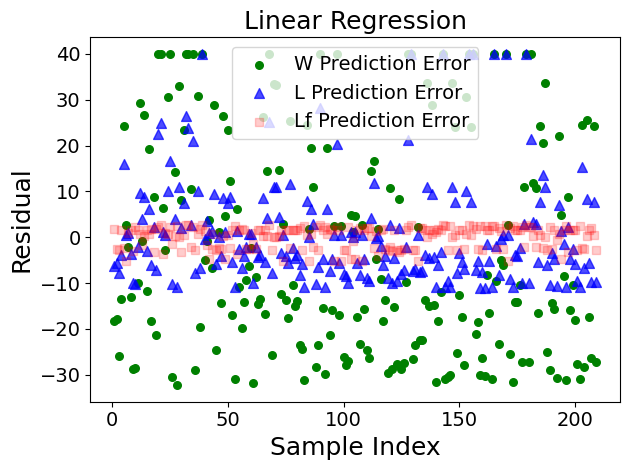

In [19]:
sample_indices = list(range(1, len(true_val_W) + 1))

# Vẽ biểu đồ dạng đường

plt.scatter(sample_indices, result['Err_W'], label='W Prediction Error', color='green', s=30, alpha= 1, marker='o')
plt.scatter(sample_indices, result['Err_L'], label='L Prediction Error', color='blue', s=50, alpha= 0.7, marker='^')
plt.scatter(sample_indices, result['Err_Lf'], label='Lf Prediction Error', color='red', s=40, alpha= 0.2, marker='s')

# Tùy chỉnh biểu đồ
plt.xlabel('Sample Index',fontsize=18)
plt.ylabel('Residual',fontsize=18)
plt.title('Linear Regression',fontsize=18)
# plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(np.arange(0, 210, 50),fontsize=14)
plt.yticks(np.arange(-30, 50, 10),fontsize=14)
# plt.xticks(sample_indices)
plt.tight_layout()
plt.show()